In [1]:
import pandas as Pd 

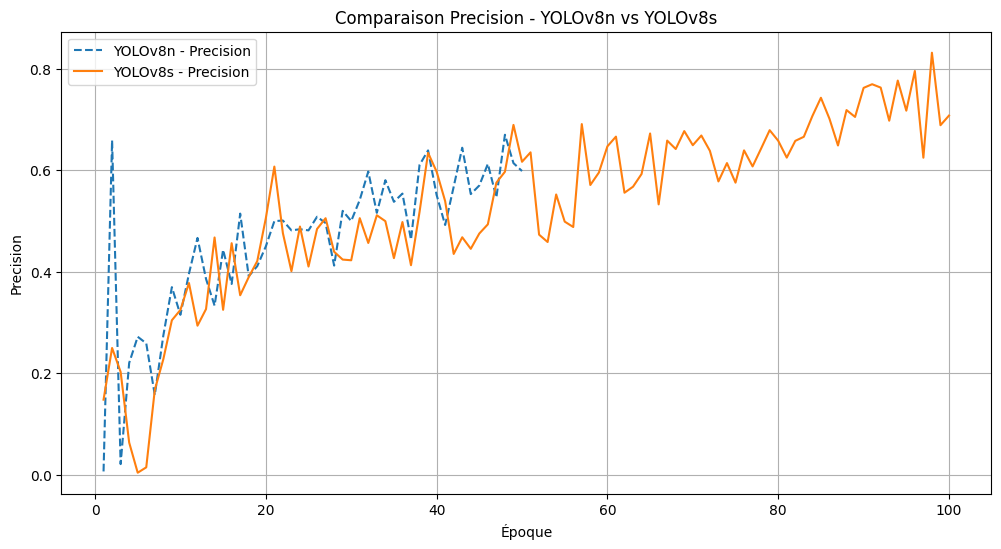

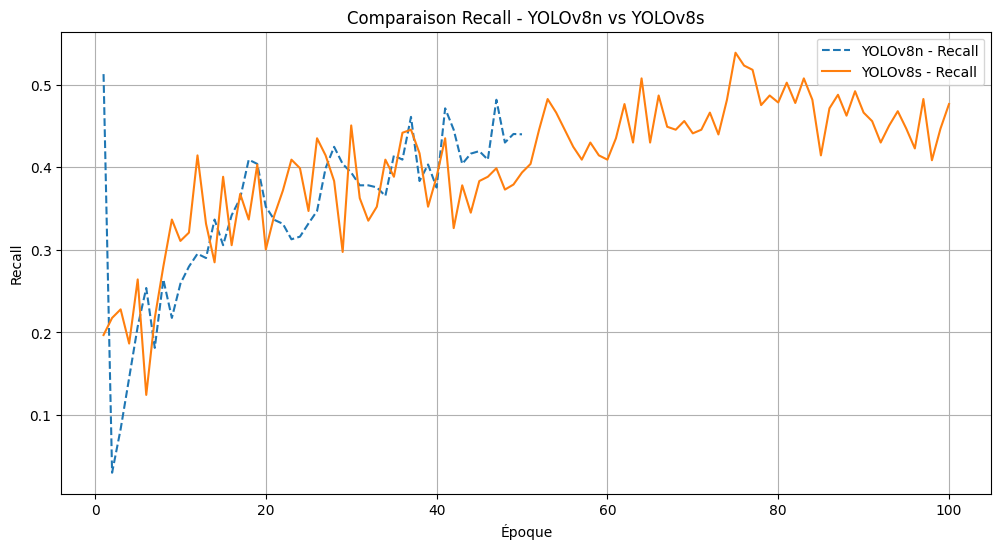

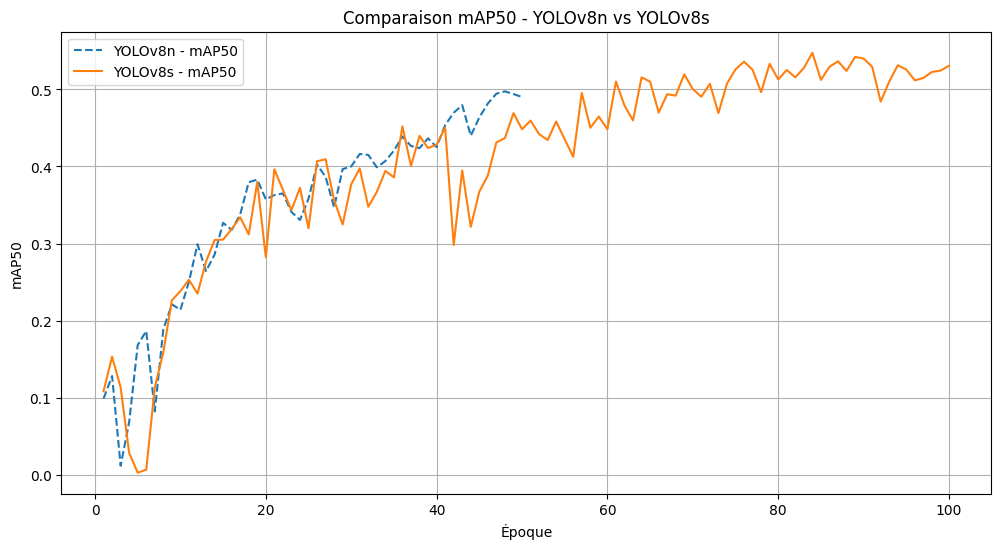

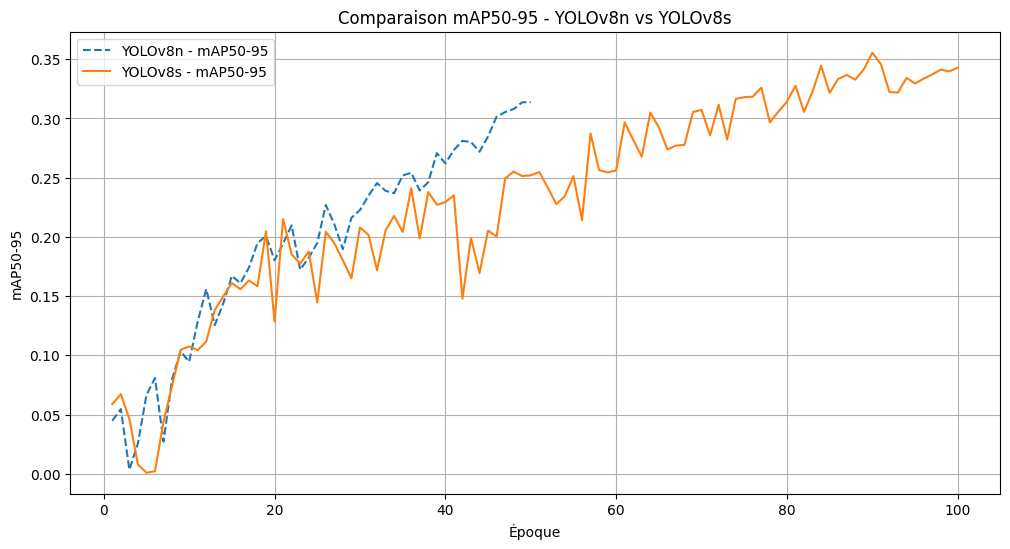

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Charger les fichiers CSV
df_n = pd.read_csv("../resultsV11v3/content/runs/train/exp1/results.csv")   # YOLOv8n
df_s = pd.read_csv("../resultsV11v3_s/content/runs/detect/train4/results.csv")  # YOLOv8s



# Tracer Precision
plt.figure(figsize=(12,6))
plt.plot(df_n['epoch'], df_n['metrics/precision(B)'], label='YOLOv8n - Precision', linestyle='--')
plt.plot(df_s['epoch'], df_s['metrics/precision(B)'], label='YOLOv8s - Precision', linestyle='-')
plt.xlabel("Époque")
plt.ylabel("Precision")
plt.title("Comparaison Precision - YOLOv8n vs YOLOv8s")
plt.legend()
plt.grid(True)
plt.show()

# Tracer Recall
plt.figure(figsize=(12,6))
plt.plot(df_n['epoch'], df_n['metrics/recall(B)'], label='YOLOv8n - Recall', linestyle='--')
plt.plot(df_s['epoch'], df_s['metrics/recall(B)'], label='YOLOv8s - Recall', linestyle='-')
plt.xlabel("Époque")
plt.ylabel("Recall")
plt.title("Comparaison Recall - YOLOv8n vs YOLOv8s")
plt.legend()
plt.grid(True)
plt.show()

# Tracer mAP50
plt.figure(figsize=(12,6))
plt.plot(df_n['epoch'], df_n['metrics/mAP50(B)'], label='YOLOv8n - mAP50', linestyle='--')
plt.plot(df_s['epoch'], df_s['metrics/mAP50(B)'], label='YOLOv8s - mAP50', linestyle='-')
plt.xlabel("Époque")
plt.ylabel("mAP50")
plt.title("Comparaison mAP50 - YOLOv8n vs YOLOv8s")
plt.legend()
plt.grid(True)
plt.show()

# Tracer mAP50-95
plt.figure(figsize=(12,6))
plt.plot(df_n['epoch'], df_n['metrics/mAP50-95(B)'], label='YOLOv8n - mAP50-95', linestyle='--')
plt.plot(df_s['epoch'], df_s['metrics/mAP50-95(B)'], label='YOLOv8s - mAP50-95', linestyle='-')
plt.xlabel("Époque")
plt.ylabel("mAP50-95")
plt.title("Comparaison mAP50-95 - YOLOv8n vs YOLOv8s")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
from ultralytics import YOLO
import pandas as pd

# Charger les deux modèles
model1 = YOLO("/home/marwa/Detection_Img/resultsV11v3/content/runs/train/exp1/weights/best.pt")
model2 = YOLO("/home/marwa/Detection_Img/resultsV11v3_s/content/runs/detect/train4/weights/best.pt")

yaml_path = ("/home/marwa/Detection_Img/dataset/data.yaml")

# Évaluer sur le dataset de test
metrics1 = model1.val(data=yaml_path, split="test")
metrics2 = model2.val(data=yaml_path, split="test")

# Extraire les métriques clés
results = {
    "Modèle exp1": {
        "Précision": metrics1.results_dict["metrics/precision(B)"],
        "Rappel": metrics1.results_dict["metrics/recall(B)"],
        "mAP50": metrics1.results_dict["metrics/mAP50(B)"],
        "mAP50-95": metrics1.results_dict["metrics/mAP50-95(B)"],
        "IoU moyen": metrics1.box.map  

    },
    "Modèle train4": {
        "Précision": metrics2.results_dict["metrics/precision(B)"],
        "Rappel": metrics2.results_dict["metrics/recall(B)"],
        "mAP50": metrics2.results_dict["metrics/mAP50(B)"],
        "mAP50-95": metrics2.results_dict["metrics/mAP50-95(B)"],
        "IoU moyen": metrics1.box.map  

    }
}

df = pd.DataFrame(results)
print(df)


Ultralytics 8.3.203 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce GTX 1650 with Max-Q Design, 4096MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3321.7±1003.3 MB/s, size: 147.3 KB)
val: Scanning /home/marwa/Detection_Img/dataset/test/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 50/50 30.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.2it/s 3.4s1.2ss
                   all         50        118      0.739      0.551      0.646      0.404
                  fire         50        118      0.739      0.551      0.646      0.404
Speed: 5.8ms preprocess, 18.1ms inference, 0.0ms loss, 12.4ms postprocess per image
Results saved to /home/marwa/Detection_Img/runs/detect/val5
Ultralytics 8.3.203 🚀 Python-3.12.3 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce GTX 1650 with Max-Q Design, 4096MiB)
Model sum